# AI for disease Prognosis

In [ ]:
!pip install tensorflow
!pip install numpy
!pip install pandas
!pip install matplotlib

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# CNN for Medical Imaging

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset_dir = '/content/drive/My Drive/dataset'

In [ ]:
!ls '/content/drive/My Drive/dataset'

COVID  NORMAL


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Reserve 20% for validation
)


In [ ]:
# Training set
train_generator = train_datagen.flow_from_directory(
    dataset_dir,  # Path to the folder containing 'COVID' and 'NORMAL'
    target_size=(128, 128),  # Resize images
    batch_size=32,
    class_mode='binary',  # Binary classification (COVID or NORMAL)
    subset='training'  # Use this subset for training
)

Found 260 images belonging to 2 classes.


In [ ]:
# Validation set
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Use this subset for validation
)

Found 64 images belonging to 2 classes.


In [ ]:
import tensorflow as tf

# Build CNN model
cnn_model = tf.keras.models.Sequential()

cnn_model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
cnn_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
cnn_model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D((2, 2)))

cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dropout(0.5))  # To prevent overfitting
cnn_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Binary output

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the CNN model
history = cnn_model.fit(
    train_generator,
    epochs=10,  # You can adjust the number of epochs
    validation_data=validation_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 97s 5s/step - accuracy: 0.5364 - loss: 0.8447 - val_accuracy: 0.5000 - val_loss: 0.6920
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.4374 - loss: 0.6954 - val_accuracy: 0.5156 - val_loss: 0.6810
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5825 - loss: 0.6703 - val_accuracy: 0.5781 - val_loss: 0.6660
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.6557 - loss: 0.6166 - val_accuracy: 0.7656 - val_loss: 0.5076
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6837 - loss: 0.5523 - val_accuracy: 0.7656 - val_loss: 0.5260
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7387 - loss: 0.5437 - val_accuracy: 0.7500 - val_loss: 0.5433
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7927 - loss: 0.5269 - val_accuracy: 0.7812 - val_loss: 0.5398
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6815 - loss: 0.5626 - val_accuracy: 0.7969 - val_loss: 0.4474
Epoch 9/10
9/9 ━━━━

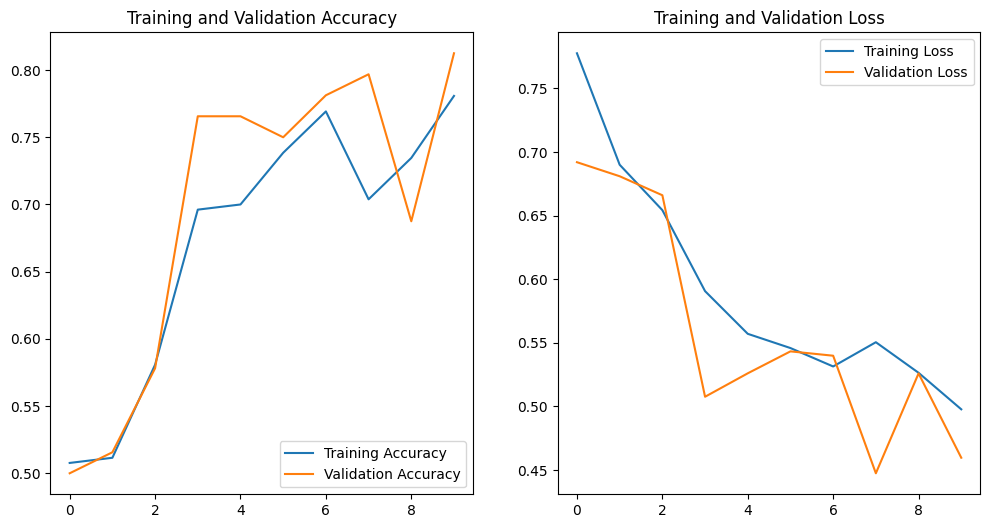

In [ ]:
# Plot accuracy and loss over time
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(validation_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step - accuracy: 0.7708 - loss: 0.4543
Test Accuracy: 76.56%


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a new image for prediction
img_path = '/content/drive/My Drive/dataset/HSIB_Website_Report_Missed_det.fe260d5e.fill-10000x10000.jpg'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale

# Predict
prediction = cnn_model.predict(img_array)
if prediction > 0.5:
    print("Prediction: NORMAL")
else:
    print("Prediction: COVID")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: COVID


# RNN for Time-Series Data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU


In [ ]:
# Step 1: Load the dataset
# Replace the path with the actual location of your Heart Attack Risk dataset.
data = pd.read_csv('/content/heart_attack_prediction_dataset.csv')

# View the first few rows to understand the structure
print(data.head())

  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Step 2: Identify non-numeric columns and encode them
# Select only numeric columns and convert categorical columns into numeric values
for column in data.columns:
    if data[column].dtype == 'object':  # If the column is categorical
        print(f"Converting {column} column")
        le = LabelEncoder()  # Initialize LabelEncoder
        data[column] = le.fit_transform(data[column].astype(str))  # Convert to numerical values

Converting Patient ID column
Converting Sex column
Converting Blood Pressure column
Converting Diet column
Converting Country column
Converting Continent column
Converting Hemisphere column


In [ ]:
# Step 3: Separate features and target
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target (e.g., heart attack risk)

In [ ]:
# Step 4: Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Reshape the data for RNN
timesteps = 5  # You can adjust this based on your data
X_rnn = []
y_rnn = []

In [ ]:
# Create sequences (for RNN input)
for i in range(timesteps, len(X_scaled)):
    X_rnn.append(X_scaled[i-timesteps:i, :])  # Create sequences of 'timesteps' length
    y_rnn.append(y[i])

X_rnn = np.array(X_rnn)
y_rnn = np.array(y_rnn)

In [ ]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rnn, y_rnn, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Build the RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Step 7: Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6178 - loss: 0.6759 - val_accuracy: 0.6450 - val_loss: 0.6637
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6440 - loss: 0.6539 - val_accuracy: 0.6570 - val_loss: 0.6518
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6444 - loss: 0.6518 - val_accuracy: 0.6570 - val_loss: 0.6507
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6362 - loss: 0.6525 - val_accuracy: 0.6570 - val_loss: 0.6568
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6390 - loss: 0.6524 - val_accuracy: 0.6570 - val_loss: 0.6505
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6291 - loss: 0.6528 - val_accuracy: 0.6564 - val_loss: 0.6530
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6383 - loss: 0.6457 - val_accuracy: 0.6553 - val_loss: 0.6528
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6354 - loss: 0.6459 - val_accuracy: 0.

In [ ]:
# Step 8: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6006 - loss: 0.6831
Test Loss: 0.6909319162368774
Test Accuracy: 0.5810502171516418


In [ ]:
# Step 9: Make predictions
predictions = model.predict(X_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
